Parameter Plots

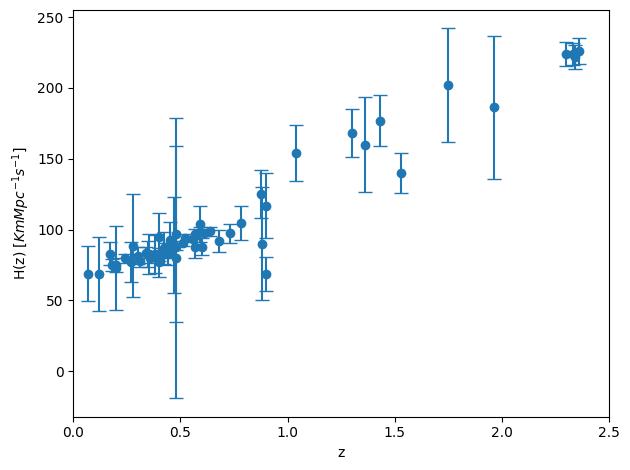

In [1]:
#H(z) vs z plot (H(z) Data plot)

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data from the text file
data_file = "/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/57data.txt"
data = np.loadtxt(data_file)

# Assuming the first column contains H values, the second column contains z values,
# and the third column contains error values for H
H_values = data[:, 0]
z_values = data[:, 2]
error_values = data[:, 1]

# Step 2: Calculate H/(z+1) for each z value
H_by_z_plus_1 = H_values

# Step 3: Create a figure with high resolution
# fig = plt.figure(figsize=(8, 6), dpi=300)

# Plot the graph with error bars
plt.errorbar(z_values, H_by_z_plus_1, yerr=error_values, fmt='o', capsize=5)
plt.xlabel('z')
plt.ylabel(r'H(z) $[Km Mpc^{-1}s^{-1}]$')
plt.xlim(0,2.5)
plt.tight_layout()  # Adjust layout for spacing
# plt.savefig('high_res_cosmo_plot.png', dpi=300)  # Save the high-resolution plot
plt.show()


Age of Universe

In [16]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-0.1, 2, 50)

def age(H_o, b):
    return ((b*(z+1)**(-1/b))/H_o)*1000

# Define colors for each curve
colors = {
    'H(z)': 'blue',
    'BAO': 'green',
    'Pantheon': 'red',
    'H(z) + Pantheon': 'purple',
    'H(z) + BAO + Pantheon': '#8C564B'
}

# Hz
Ho_H = 69.860
b_H = 1.001
t_H = age(Ho_H, b_H)
t_0_H = ((b_H*(1)**(-1/b_H))/Ho_H)*1000

# BAO
Ho_BAO = 70.921
b_BAO = 0.996
t_BAO = age(Ho_BAO, b_BAO)
t_0_BAO = ((b_BAO*(1)**(-1/b_BAO))/Ho_BAO)*1000

# Pantheon
Ho_Pan = 69.320
b_Pan = 1.003
t_Pan = age(Ho_Pan, b_Pan)
t_0_Pan = ((b_Pan*(1)**(-1/b_Pan))/Ho_Pan)*1000

# Hz Pantheon
Ho_HP = 68.912
b_HP = 1.005
t_HP = age(Ho_HP, b_HP)
t_0_HP = ((b_HP*(1)**(-1/b_HP))/Ho_HP)*1000

# Hz BAO Pantheon
Ho_HBP = 69.460
b_HBP = 1.002
t_HBP = age(Ho_HBP, b_HBP)
t_0_HBP = ((b_HBP*(1)**(-1/b_HBP))/Ho_HBP)*1000

# Create individual plots for each curve with legends and save them as separate images
for label, color, t_data in [('H(z)', 'blue', t_H), ('BAO', 'green', t_BAO), ('Pantheon', 'red', t_Pan), ('H(z) + Pantheon', 'purple', t_HP), ('H(z) + BAO + Pantheon', '#8C564B', t_HBP)]:
    plt.figure(figsize=(8, 6))
    plt.plot(z, t_data, linewidth=2, color=color, label=label)
    plt.xlabel('z')
    plt.ylabel('t (Age of Universe)')
    plt.legend()
    plt.xlim(0,2)
    plt.ylim(5,15)
    plt.grid(True)
    plt.savefig(f'/home/suresh/Projects/Cosmology_Project/FRW_paper1/Bianchi_1/age_of_universe_{label}.png')
    plt.close()



# Calculate the value where the plot intersects y axis for x = 0
# t_at_z_zero = age(0, b, H_o)
print("Age of Universe for H(z)", t_0_H)
print("Age of Universe for BAO", t_0_BAO)
print("Age of Universe for Pantheon", t_0_Pan)
print("Age of Universe for H(z) + Pantheon", t_0_HP)
print("Age of Universe for H(z) + BAO + Pantheon", t_0_HBP)


Age of Universe for H(z) 14.328657314629256
Age of Universe for BAO 14.0437952087534
Age of Universe for Pantheon 14.469128678592035
Age of Universe for H(z) + Pantheon 14.583817042024608
Age of Universe for H(z) + BAO + Pantheon 14.425568672617334


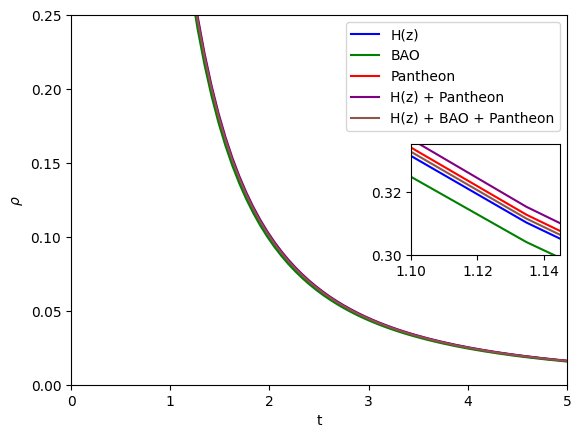

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


t = np.linspace(0.01, 14, 200)
ki = 0
def rho(b):
    return ((27*(ki)*(b**2)*(2*b - 1))+(b*(3*b - 2)*((8*3.14*(t**2)) - 9*ki*b*(2*b-1)))/((54*(ki**2)*(b**2)*((2*b-1)**2))+((64*((3.14)**2)*t**2)-288*(3.14)*ki*b*(2*b-1))*(t**2)))

def p(b):
    return -(21 * ki * b**2 * (3*b - 2) * (2*b - 1) + 3 * b**2 * (8 * (3.14) * t**2 - 27 * ki * b * (2*b - 1))/(54 * ki**2 * b**2 * (2*b - 1)**2 +((64*((3.14)**2)*t**2)-288*(3.14)*ki*b*(2*b-1))*(t**2)))

# Hz

rho_H = rho(b_H)
p_H = p(b_H)

# BAO

rho_BAO = rho(b_BAO)
p_BAO = p(b_H)

# Pantheon

rho_Pan = rho(b_Pan)
p_Pan = p(b_H)

# Hz Pantheon

rho_HP = rho(b_HP)
p_HP = p(b_H)

# Hz BAO Pantheon

rho_HBP = rho(b_HBP)
p_HBP = p(b_H)


fig, ax = plt.subplots()

ax.plot(t, rho_H*10, label='H(z)', color='blue')
ax.plot(t, rho_BAO*10, label='BAO', color='green')
ax.plot(t, rho_Pan*10, label='Pantheon', color='red')
ax.plot(t, rho_HP*10, label='H(z) + Pantheon', color='purple')
ax.plot(t, rho_HBP*10, label='H(z) + BAO + Pantheon', color='#8C564B')
ax.set_ylim(-0, 0.25)
ax.set_xlim(0,5)
# Add a legend outside the plot
ax.legend(loc='upper right')

ax.set_xlabel('t')
ax.set_ylabel(r'$\rho$')

# Create a mini plot inside the main plot
axins = inset_axes(ax, width='30%', height='30%', loc='center right', borderpad=0.5)
axins.plot(t, rho_H*10, color='blue')
axins.plot(t, rho_BAO*10, color='green')
axins.plot(t, rho_Pan*10, color='red')
axins.plot(t, rho_HP*10, color='purple')
axins.plot(t, rho_HBP*10, color='#8C564B')

axins.set_xlim(1.1, 1.145)
axins.set_ylim(0.3, 0.335)

plt.show()

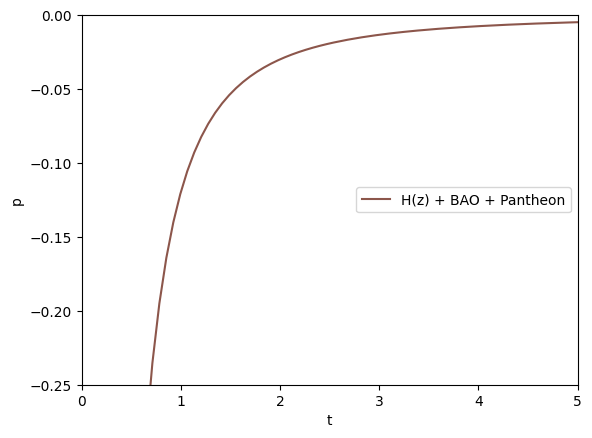

In [4]:
# p z plot


fig, ax = plt.subplots()
 
plt.plot(t, p_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')

ax.legend(loc='center right')

ax.set_xlabel('t')
ax.set_ylabel('p')
ax.set_xlim(0,5)
ax.set_ylim(-0.25,0)


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

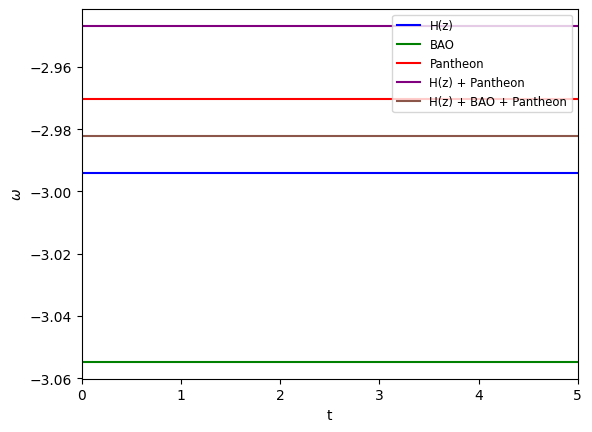

In [5]:
# omega z plot

omega_H = p_H/(rho_H)
omega_BAO = p_BAO/(rho_BAO)
omega_Pan = p_Pan/(rho_Pan)
omega_HP = p_HP/(rho_HP)
omega_HBP = p_HBP/(rho_HBP)
# print(omega_HBP)
plt.plot(t, omega_H, label='H(z)', color='blue')       
plt.plot(t, omega_BAO, label='BAO', color='green')  
plt.plot(t, omega_Pan, label='Pantheon', color='red') 
plt.plot(t, omega_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(t, omega_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')
plt.xlim(0,5)
plt.legend(loc='upper right',fontsize='small')

plt.xlabel('t')
plt.ylabel(r'$\omega$')
plt.show

Energy Conditions

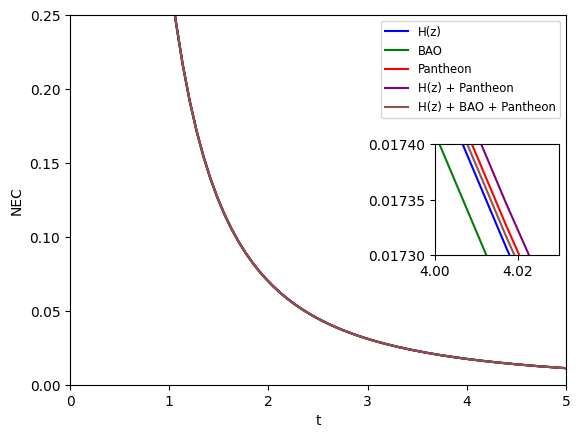

In [6]:
#NEC vs z plot

NEC_H = rho_H - 2*p_H
NEC_BAO = rho_BAO - 2*p_BAO
NEC_Pan = rho_Pan - 2*p_Pan
NEC_HP = rho_HP - 2*p_HP
NEC_HBP = rho_HBP - 2*p_HBP

fig, ax = plt.subplots()

plt.plot(t, NEC_H, label='H(z)', color='blue')       
plt.plot(t, NEC_BAO, label='BAO', color='green')  
plt.plot(t, NEC_Pan, label='Pantheon', color='red') 
plt.plot(t, NEC_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(t, NEC_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')
ax.legend(loc='upper right',fontsize='small')

ax.set_xlabel('t')
ax.set_ylabel('NEC')
ax.set_xlim(0,5)
ax.set_ylim(-0,0.25)

# Create a mini plot inside the main plot
axins = inset_axes(ax, width='25%', height='30%', loc='center right', borderpad=0.5)
axins.plot(t, NEC_H, color='blue')
axins.plot(t, NEC_BAO, color='green')
axins.plot(t, NEC_Pan, color='red')
axins.plot(t, NEC_HP, color='purple')
axins.plot(t, NEC_HBP, color='#8C564B')

axins.set_xlim(4.0,4.03)
axins.set_ylim(0.0173, 0.0174)

plt.show()

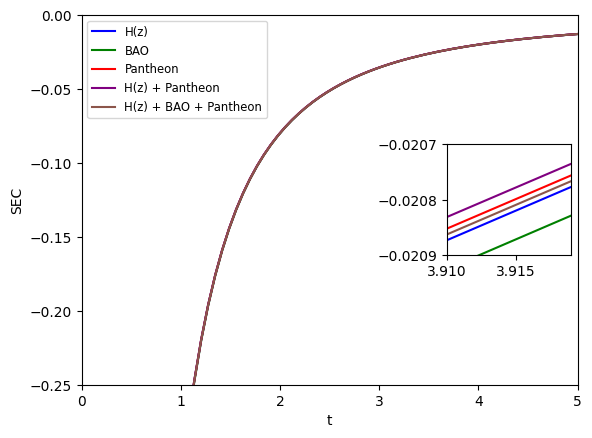

In [7]:
#SEC vs z plot

SEC_H = rho_H + 3*p_H
SEC_BAO = rho_BAO + 3*p_BAO
SEC_Pan = rho_Pan + 3*p_Pan
SEC_HP = rho_HP + 3*p_HP
SEC_HBP = rho_HBP + 3*p_HBP

fig, ax = plt.subplots()

plt.plot(t, SEC_H, label='H(z)', color='blue')       
plt.plot(t, SEC_BAO, label='BAO', color='green')  
plt.plot(t, SEC_Pan, label='Pantheon', color='red') 
plt.plot(t, SEC_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(t, SEC_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')

ax.legend(loc='upper left',fontsize='small')

ax.set_xlabel('t')
ax.set_ylabel('SEC')
ax.set_xlim(0,5)
ax.set_ylim(-0.25,0)


# Create a mini plot inside the main plot
axins = inset_axes(ax, width='25%', height='30%', loc='center right', borderpad=0.5)
axins.plot(t, SEC_H, color='blue')
axins.plot(t, SEC_BAO, color='green')
axins.plot(t, SEC_Pan, color='red')
axins.plot(t, SEC_HP, color='purple')
axins.plot(t, SEC_HBP, color='#8C564B')

axins.set_xlim(3.91, 3.919)
axins.set_ylim(-0.0209,-0.0207)

plt.show()

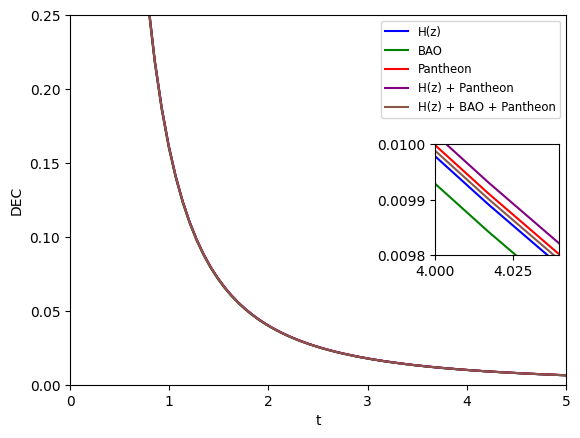

In [8]:
#DEC vs z plot



DEC_H = rho_H - p_H
DEC_BAO = rho_BAO - p_BAO
DEC_Pan = rho_Pan - p_Pan
DEC_HP = rho_HP - p_HP
DEC_HBP = rho_HBP - p_HBP

fig, ax = plt.subplots()

plt.plot(t, DEC_H, label='H(z)', color='blue')       
plt.plot(t, DEC_BAO, label='BAO', color='green')  
plt.plot(t, DEC_Pan, label='Pantheon', color='red') 
plt.plot(t, DEC_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(t, DEC_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')

ax.legend(loc='upper right', fontsize = 'small')

ax.set_xlabel('t')
ax.set_ylabel('DEC')
ax.set_xlim(0,5)
ax.set_ylim(-0,0.25)


# Create a mini plot inside the main plot
axins = inset_axes(ax, width='25%', height='30%', loc='center right', borderpad=0.5)
axins.plot(t, DEC_H, color='blue')
axins.plot(t, DEC_BAO, color='green')
axins.plot(t, DEC_Pan, color='red')
axins.plot(t, DEC_HP, color='purple')
axins.plot(t, DEC_HBP, color='#8C564B')

axins.set_xlim(4.0,4.04)
axins.set_ylim(0.0098, 0.01)



plt.show()

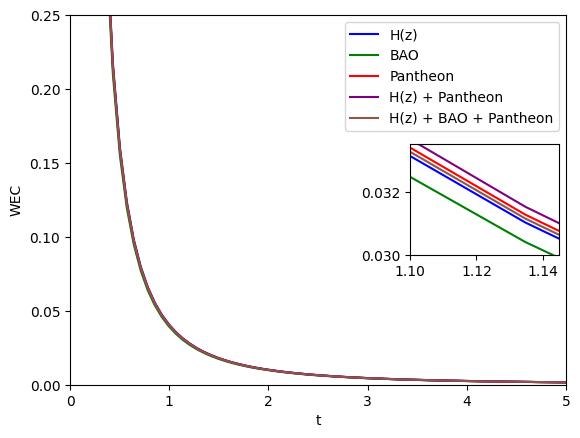

In [9]:
#WEC

fig, ax = plt.subplots()

ax.plot(t, rho_H, label='H(z)', color='blue')
ax.plot(t, rho_BAO, label='BAO', color='green')
ax.plot(t, rho_Pan, label='Pantheon', color='red')
ax.plot(t, rho_HP, label='H(z) + Pantheon', color='purple')
ax.plot(t, rho_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')
ax.set_ylim(-0, 0.25)
ax.set_xlim(0,5)
# Add a legend outside the plot
ax.legend(loc='upper right')

ax.set_xlabel('t')
ax.set_ylabel(r'WEC')

# Create a mini plot inside the main plot
axins = inset_axes(ax, width='30%', height='30%', loc='center right', borderpad=0.5)
axins.plot(t, rho_H, color='blue')
axins.plot(t, rho_BAO, color='green')
axins.plot(t, rho_Pan, color='red')
axins.plot(t, rho_HP, color='purple')
axins.plot(t, rho_HBP, color='#8C564B')

axins.set_xlim(1.1, 1.145)
axins.set_ylim(0.03, 0.0335)

plt.show()

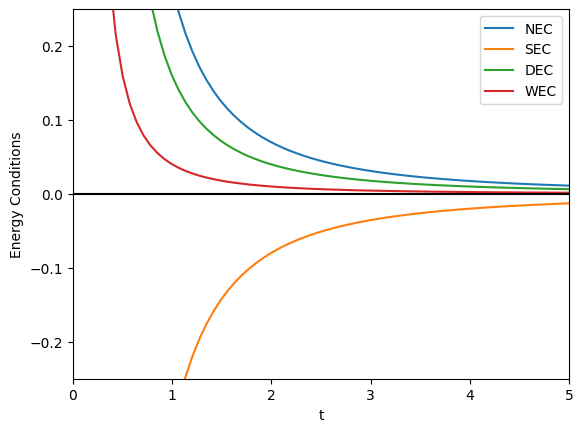

In [10]:
#Common Energy Conditions

plt.plot(t, NEC_HBP, label='NEC')
plt.plot(t, SEC_HBP, label='SEC')
plt.plot(t, DEC_HBP, label='DEC')
plt.plot(t, rho_HBP, label='WEC')
plt.axhline(0, color='black') #linestyle='--')

plt.legend()

plt.ylim(-0.25,0.25)
plt.xlim(0,5)

plt.xlabel('t')
plt.ylabel('Energy Conditions')

plt.show()

Om(z) Parameter


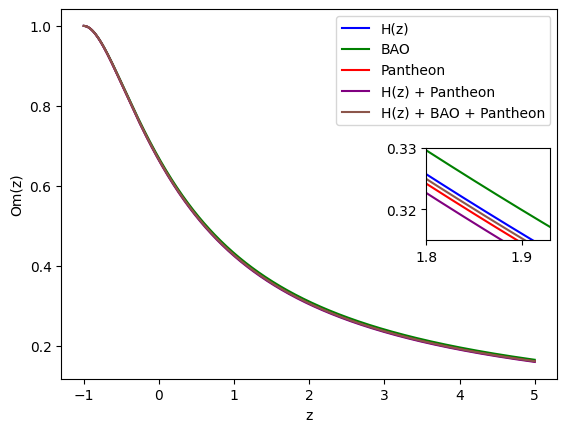

In [11]:
#Om z plot

z = np.linspace(-1,5,500)
def om(b):
    return (((1+z)**(2/b))-1)/(((1+z)**3)-1)

# Hz

om_H = om(b_H)

# BAO

om_BAO = om(b_BAO)

# Pantheon

om_Pan = om(b_Pan)

# Hz Pantheon
om_HP = om(b_HP)

# Hz BAO Pantheon

om_HBP = om(b_HBP)

fig, ax = plt.subplots()

plt.plot(z, om_H, label='H(z)', color='blue')       
plt.plot(z, om_BAO, label='BAO', color='green')  
plt.plot(z, om_Pan, label='Pantheon', color='red') 
plt.plot(z, om_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(z, om_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')

ax.legend(loc='upper right')

ax.set_xlabel('z')
ax.set_ylabel('Om(z)')

# Create a mini plot inside the main plot
axins = inset_axes(ax, width='25%', height='25%', loc='center right', borderpad=0.5)
axins.plot(z, om_H, color='blue')
axins.plot(z, om_BAO, color='green')
axins.plot(z, om_Pan, color='red')
axins.plot(z, om_HP, color='purple')
axins.plot(z, om_HBP, color='#8C564B')

axins.set_xlim(1.8,1.93)
axins.set_ylim(0.315, 0.33)

plt.show()

Jerk parameter


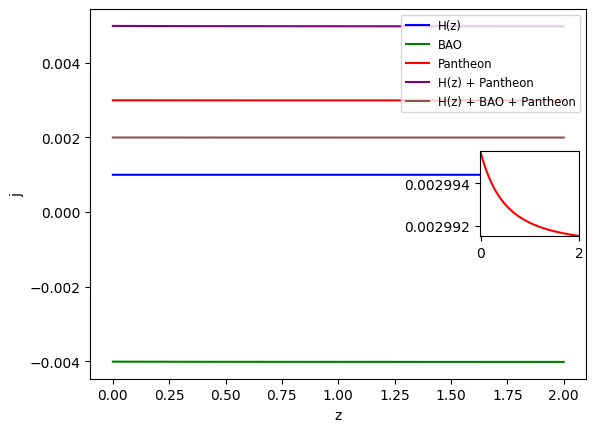

0.000999499003990878
-0.00400793496671592
0.0029954733218248153
0.004987377472130627
0.0019979920637130943


In [12]:
# Jerk Parameter

z = np.linspace(0,2,500)

def j(b):
    return ((-1 / b) + (((b - 1) ** 2) / ((2 * ((b) ** 4)) * ((z + 1) ** 2))) + 1)


# Hz

j_H = j(b_H)

# BAO

j_BAO = j(b_BAO)

# Pantheon

j_Pan = j(b_Pan)

# Hz Pantheon

j_HP = j(b_HP)

# Hz BAO Pantheon

j_HBP = j(b_HBP)

fig, ax = plt.subplots()

plt.plot(z, j_H, label='H(z)', color='blue')       
plt.plot(z, j_BAO, label='BAO', color='green')  
plt.plot(z, j_Pan, label='Pantheon', color='red') 
plt.plot(z, j_HP, label='H(z) + Pantheon', color='purple')  
plt.plot(z, j_HBP, label='H(z) + BAO + Pantheon', color='#8C564B')

ax.legend(loc='upper right', fontsize = 'small')

ax.set_xlabel('z')
ax.set_ylabel('j')

# Create a mini plot inside the main plot
axins = inset_axes(ax, width='20%', height='23%', loc='center right', borderpad=0.5)
axins.plot(z, j_H, color='blue')
axins.plot(z, j_BAO, color='green')
axins.plot(z, j_Pan, color='red')
axins.plot(z, j_HP, color='purple')
axins.plot(z, j_HBP, color='#8C564B')

axins.set_xlim(-0.01,2)
axins.set_ylim(0.0029915,0.0029955)

plt.show()

print(j_H[0])
print(j_BAO[0])
print(j_Pan[0])
print(j_HP[0])
print(j_HBP[0])

State Finder Plots

/tmp/ipykernel_21401/2904345529.py:4: RuntimeWarning: invalid value encountered in divide
  s = (-1 + r)/(3*(-0.5 + q))


<function matplotlib.pyplot.show(*args, **kw)>

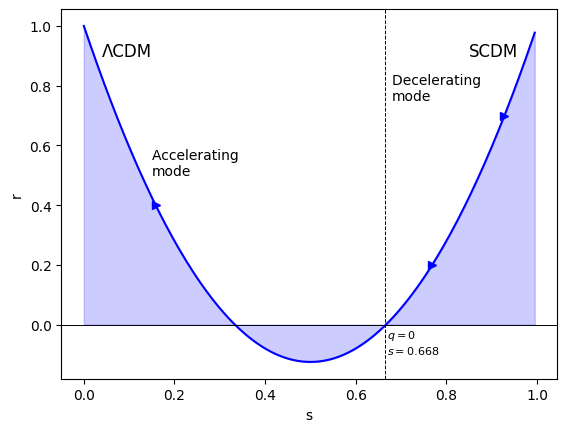

In [13]:
# r s plot
q = np.linspace(-1,0.5,200)
r = 2*(q**2) + q
s = (-1 + r)/(3*(-0.5 + q))

plt.xlabel('s')
plt.ylabel('r')

plt.plot(s,r, color = 'blue')
plt.fill_between(s, r, alpha = 0.2, color = 'blue')

plt.axhline(y = 0, color = 'black', linewidth = 0.7)
plt.axvline(x = 0.665, color = 'black', linewidth = 0.7, linestyle = '--')
plt.text(0.15, 0.5, 'Accelerating \nmode', fontsize=10, color='black')
plt.text(0.67, -0.1, '$q = 0$ \n$s = 0.668$', fontsize=8, color='black')
plt.text(0.68, 0.75, 'Decelerating \nmode', fontsize=10, color='black')
plt.text(0.85, 0.9, 'SCDM', fontsize=12, color='black')
plt.text(0.04, 0.9, 'ΛCDM', fontsize=12, color='black')
plt.plot(0.16,0.4,'k>', color = 'blue')
plt.plot(0.768,0.2,'k>', color = 'blue')
plt.plot(0.928,0.7,'k>', color = 'blue')

plt.show

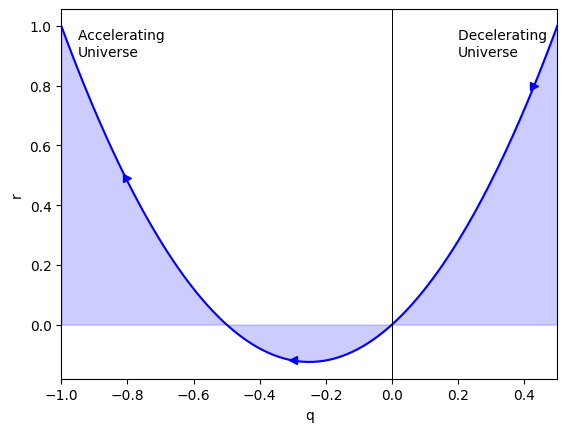

In [14]:
plt.plot(q,r, color = 'blue')
plt.fill_between(q, r, alpha = 0.2, color = 'blue')

plt.xlim(-1,0.5)
plt.xlabel('q')
plt.ylabel('r')
plt.axvline(x = 0, color = 'black', linewidth = 0.7)
# plt.axvline(x = 0.665, color = 'black', linewidth = 0.7, linestyle = '--')
plt.text(-0.95,0.9, 'Accelerating \nUniverse', fontsize=10, color='black')
# plt.text(0.67, -0.1, '$q = 0$ \n$s = 0.668$', fontsize=8, color='black')
plt.text(0.2, 0.9, 'Decelerating \nUniverse', fontsize=10, color='black')
# plt.text(0.85, 0.9, 'SCDM', fontsize=12, color='black')
plt.plot(-0.802,0.49,'k>', color = 'blue')
plt.plot(0.43,0.8,'k>', color = 'blue')
plt.plot(-0.3,-0.12,'<k', color = 'blue')
plt.show()